In [1]:
 pip install --upgrade tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [2]:
IMAGE_SHAPE = (224,224)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)
training_data = 'Untouch_DataSet_1/Processed_Dataset/train'
training_image_data = image_generator.flow_from_directory(training_data,target_size=IMAGE_SHAPE)

Found 43567 images belonging to 5 classes.


In [3]:
validation_data = 'Untouch_DataSet_1/Processed_Dataset/val'
validation_image_data = image_generator.flow_from_directory(validation_data,target_size=IMAGE_SHAPE)

Found 16334 images belonging to 5 classes.


In [4]:
class_names = sorted(training_image_data.class_indices.items(),key = lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Anthracnose_1', 'Black_Spot_1', 'Phytophthora_1',
       'Powdery_Mildew_1', 'Ring_Spot_1'], dtype='<U16')

In [5]:
MobileNetV2=tf.keras.applications.mobilenet_v2.MobileNetV2
model_arch=MobileNetV2()
model_arch.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [7]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [8]:
feature_extractor = hub.KerasLayer(feature_extractor_model, input_shape = (224,224,3),trainable = False)

In [9]:
for image_batch, label_batch in training_image_data:
    print("Image Batch Shape : ", image_batch.shape)
    print("Label Batch Shape : ", label_batch.shape)
    break

Image Batch Shape :  (32, 224, 224, 3)
Label Batch Shape :  (32, 5)


In [10]:
model_truck = tf.keras.Sequential([feature_extractor ])
model_truck.add(tf.keras.layers.Dense(5, activation='relu'))
model_truck.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
model_truck.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])

In [12]:
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc =[]
    def on_train_batch_end(self,batch,logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        self.model.reset_metrics()
        
batch_stats_callback = CollectBatchStats()

In [13]:
#Mobile Net V2

r=model_truck.fit(training_image_data, 
          epochs = 5)

Epoch 1/5
1362/1362 [==============================] - 2283s 2s/step - loss: 0.3576 - acc: 0.8423
Epoch 2/5
1362/1362 [==============================] - 2250s 2s/step - loss: 0.2205 - acc: 0.8741
Epoch 3/5
1362/1362 [==============================] - 2214s 2s/step - loss: 0.2108 - acc: 0.8743
Epoch 4/5
1362/1362 [==============================] - 2179s 2s/step - loss: 0.2072 - acc: 0.8745
Epoch 5/5
1362/1362 [==============================] - 2145s 2s/step - loss: 0.2052 - acc: 0.8745


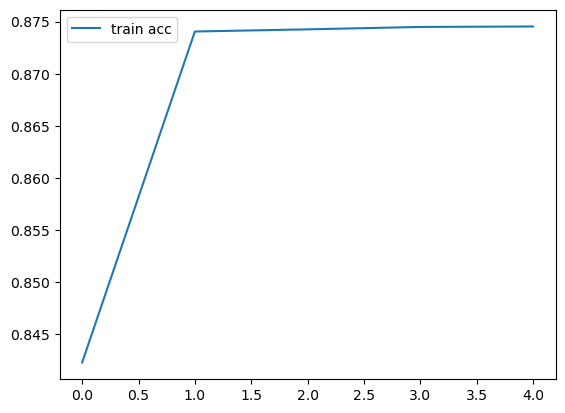

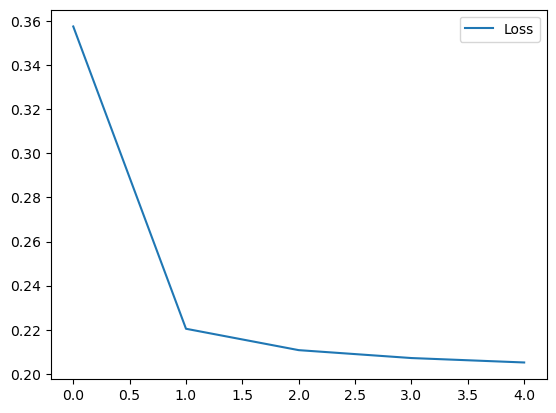

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# plot the accuracy
plt.plot(r.history['loss'], label='Loss')
plt.legend()
plt.show()
plt.savefig('Loss Acc')

In [15]:
model_truck.save('Untouch_DataSet_1\Saved_model1\MobileNetV2.h5')

In [21]:
from sklearn.metrics import classification_report

Y_pred = model_truck.predict(training_image_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(training_image_data.classes, y_pred))


1362/1362 [==============================] - 964s 708ms/step
              precision    recall  f1-score   support

           0       0.12      0.25      0.16      5334
           1       0.23      0.23      0.23      9887
           2       0.21      0.21      0.21      9170
           3       0.31      0.31      0.31     13712
           4       0.00      0.00      0.00      5464

    accuracy                           0.22     43567
   macro avg       0.17      0.20      0.18     43567
weighted avg       0.21      0.22      0.21     43567



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
